In [3]:
import pandas as pd
df = pd.read_csv("D:/Tugas Akhir/Codingan/Development/App/data/df_train_YESUSFIX.csv")
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM13274,Kota Jakarta Timur,Perempuan,1999-01-23,2021-11-30,2023-02-02,Single,0,D2,4.0,...,4.341320e+07,3.100943e+06,1.12750,Mid-term,2.800000,1,3.100943e+06,3,1.033648e+06,1.8
1,EM10730,Tangerang,Laki-laki,1998-04-12,2023-01-31,2024-03-16,Single,0,SLTA,2.0,...,1.489849e+07,1.146038e+06,1.22500,Mid-term,4.333333,1,1.146038e+06,1,1.146038e+06,2.6
2,EM4510,Kabupaten Bekasi,Laki-laki,1981-06-10,2021-10-30,2023-12-15,Married,2,SLTA,0.0,...,2.003449e+08,2.671265e+06,1.18125,Mid-term,25.000000,4,2.003449e+06,1,8.013796e+06,3.0
3,EM2622,Kabupaten Bekasi,Laki-laki,1981-07-26,2021-09-13,2023-10-31,Married,3,SLTA,0.0,...,2.537505e+08,2.537505e+06,1.22000,Mid-term,25.000000,4,2.537505e+06,1,1.015002e+07,4.0
4,EM0633,Kota Jakarta Pusat,Laki-laki,1988-07-07,2022-08-22,2023-10-01,Married,1,SLTA,8.0,...,3.312456e+07,1.274022e+06,1.18250,Mid-term,1.444444,1,2.548043e+06,1,2.548043e+06,1.8


In [4]:
X = df.drop(columns=['active_work_months','churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y = df['active_work_months']

df['join_date'] = pd.to_datetime(df['join_date'])

train_data = df[df['join_date'] < '2023-01-01']
valid_data = df[df['join_date'] >= '2023-01-01']

X_train = train_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_train = train_data['active_work_months']

X_valid = valid_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_valid = valid_data['active_work_months']

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 
               'performance_rating',
               'education', 'active_work_category', 'jenis_kelamin']

In [5]:
X = df.drop(columns=['active_work_months','churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y = df['active_work_months']

df['join_date'] = pd.to_datetime(df['join_date'])

train_data = df[df['join_date'] < '2023-01-01']
valid_data = df[df['join_date'] >= '2023-01-01']

X_train = train_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_train = train_data['active_work_months']

X_valid = valid_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_valid = valid_data['active_work_months']

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 
               'performance_rating',
               'education', 'active_work_category', 'jenis_kelamin']

In [6]:
X = df.drop(columns=['active_work_months','churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y = df['active_work_months']

df['join_date'] = pd.to_datetime(df['join_date'])

train_data = df[df['join_date'] < '2023-01-01']
valid_data = df[df['join_date'] >= '2023-01-01']

X_train = train_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_train = train_data['active_work_months']

X_valid = valid_data.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y_valid = valid_data['active_work_months']

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 
               'performance_rating',
               'education', 'active_work_category', 'jenis_kelamin']

In [7]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    cat_features=cat_feature,
    loss_function='RMSE',  # Fungsi kerugian regresi, seperti RMSE atau MAE
    eval_metric='RMSE',    # Metrik evaluasi regresi
    verbose=200
)

model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)

0:	learn: 13.6415247	test: 22.1879174	best: 22.1879174 (0)	total: 302ms	remaining: 5m 1s
200:	learn: 2.2485216	test: 4.1162352	best: 4.1162352 (200)	total: 21.1s	remaining: 1m 23s
400:	learn: 0.5928453	test: 1.3994778	best: 1.3994778 (400)	total: 42.9s	remaining: 1m 4s
600:	learn: 0.3630271	test: 0.9035525	best: 0.9035525 (600)	total: 1m 2s	remaining: 41.7s
800:	learn: 0.3137175	test: 0.7312542	best: 0.7312542 (800)	total: 1m 23s	remaining: 20.8s
999:	learn: 0.2992165	test: 0.6687708	best: 0.6687708 (998)	total: 1m 43s	remaining: 0us

bestTest = 0.6687708244
bestIteration = 998

Shrink model to first 999 iterations.


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Prediksi pada data training dan validasi
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

# Menghitung metrik regresi untuk training
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

# Menghitung metrik regresi untuk validasi
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)
r2_valid = r2_score(y_valid, y_pred_valid)
mape_valid = mean_absolute_percentage_error(y_valid, y_pred_valid)

# Membuat dataframe hasil metrik untuk training dan validation
metrics = {
    "MSE": [mse_train, mse_valid],
    "MAE": [mae_train, mae_valid],
    "RMSE": [rmse_train, rmse_valid],
    "R2 Score": [r2_train, r2_valid],
    "MAPE": [mape_train, mape_valid]
}

metrics_df = pd.DataFrame(metrics, index=["Train", "Validation"])
metrics_df

,MSE,MAE,RMSE,R2 Score,MAPE
Train,0.087987,0.240740,0.296626,0.999536,0.010529
Validation,0.447254,0.483388,0.668771,0.984317,0.064341


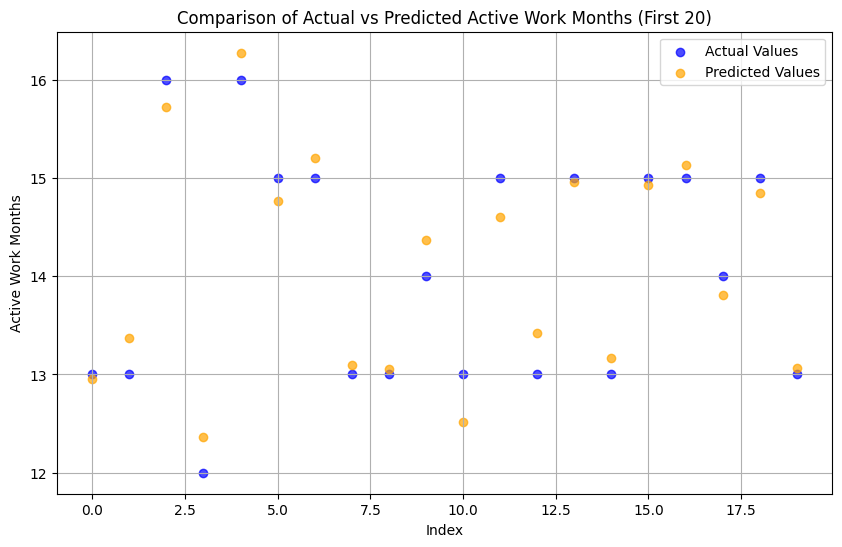

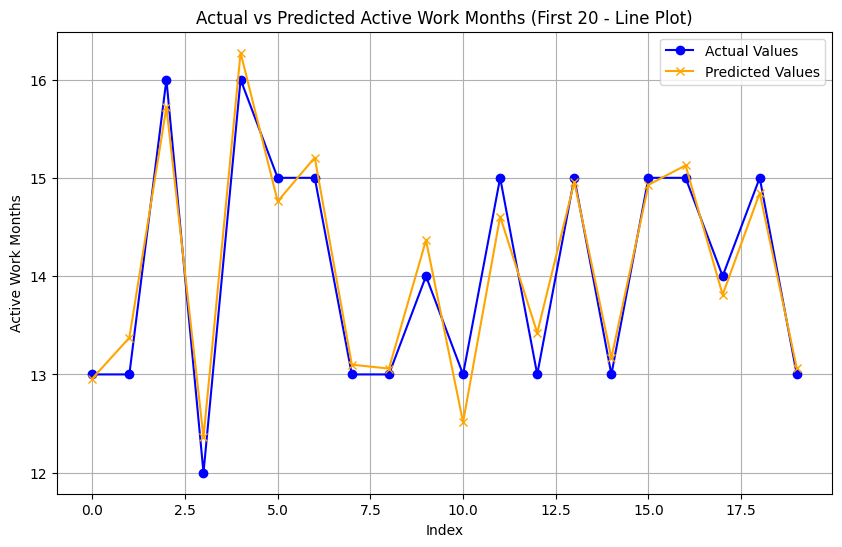

In [13]:
import matplotlib.pyplot as plt

# Membuat DataFrame untuk mempermudah visualisasi
comparison_df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_valid})

# Membatasi hanya pada 20 indeks pertama
comparison_df_subset = comparison_df.iloc[:20]

# Scatter plot untuk membandingkan prediksi dan nilai asli
plt.figure(figsize=(10, 6))
plt.scatter(range(len(comparison_df_subset)), comparison_df_subset['Actual'], label='Actual Values', alpha=0.7, color='blue')
plt.scatter(range(len(comparison_df_subset)), comparison_df_subset['Predicted'], label='Predicted Values', alpha=0.7, color='orange')
plt.title('Comparison of Actual vs Predicted Active Work Months (First 20)')
plt.xlabel('Index')
plt.ylabel('Active Work Months')
plt.legend()
plt.grid(True)
plt.show()

# Line plot untuk membandingkan prediksi dan nilai asli
plt.figure(figsize=(10, 6))
plt.plot(range(len(comparison_df_subset)), comparison_df_subset['Actual'], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(comparison_df_subset)), comparison_df_subset['Predicted'], label='Predicted Values', marker='x', linestyle='-', color='orange')
plt.title('Actual vs Predicted Active Work Months (First 20 - Line Plot)')
plt.xlabel('Index')
plt.ylabel('Active Work Months')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Fungsi objective untuk Optuna
def objective(trial):
    # Definisikan parameter yang akan dioptimasi
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5, 20),
        'random_strength': trial.suggest_float('random_strength', 5, 10),
        'cat_features': cat_feature,
        'loss_function': 'RMSE',  # Fungsi kerugian untuk regresi
        'random_state': 42,
        'verbose': 0
    }

    # Inisialisasi model dengan parameter yang dioptimasi
    model = CatBoostRegressor(**params)

    # Melatih model dengan validasi
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)

    # Prediksi nilai target
    y_pred = model.predict(X_valid)

    # Hitung RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    return rmse  # Mengembalikan RMSE sebagai skor yang ingin diminimalkan

# Membuat studi Optuna
study = optuna.create_study(direction="minimize")  # Minimalkan RMSE
study.optimize(objective, n_trials=20)

# Menampilkan hasil terbaik
print("Best trial:")
print(f"  RMSE: {study.best_value}")
print(f"  Params: {study.best_params}")

d:\Tugas Akhir\Codingan\Development\App\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-04 22:29:56,300] A new study created in memory with name: no-name-5f450915-e8ec-423f-af93-dc5cee2abef1
[I 2025-04-04 22:30:38,921] Trial 0 finished with value: 5.027911535965598 and parameters: {'iterations': 828, 'learning_rate': 0.003039755066748184, 'depth': 5, 'subsample': 0.6406811688382896, 'colsample_bylevel': 0.6700948872717083, 'l2_leaf_reg': 10.502812317409354, 'random_strength': 7.116328800518758}. Best is trial 0 with value: 5.027911535965598.
[I 2025-04-04 22:31:06,178] Trial 1 finished with value: 2.389210818104853 and parameters: {'iterations': 572, 'learning_rate': 0.011984055286167236, 'depth': 4, 'subsample': 0.7785668325606546, 'colsample_bylevel': 0.6268870831020625, 'l2_leaf_reg': 17.958517

Best trial:
  RMSE: 0.6157041187412208
  Params: {'iterations': 503, 'learning_rate': 0.0866185851000775, 'depth': 4, 'subsample': 0.5371663779257849, 'colsample_bylevel': 0.5016226137544185, 'l2_leaf_reg': 5.346951929033616, 'random_strength': 5.681306576208469}


In [15]:
from sklearn.metrics import mean_squared_error

# Ambil parameter terbaik dari Optuna
best_params = study.best_trial.params

# Tambahkan parameter tetap (yang tidak dioptimasi)
best_params.update({
    'loss_function': 'RMSE',  # Gunakan RMSE sebagai loss function
    'cat_features': cat_feature,
    'random_state': 42,
    'verbose': 200,  # Aktifkan output verbose
    'od_type': 'Iter',
    'od_wait': 50
})

# Latih model dengan parameter terbaik
final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)

# Evaluasi model final
y_pred = final_model.predict(X_valid)
final_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))  # Hitung RMSE
print(f"Final RMSE: {final_rmse}")

0:	learn: 12.9088521	test: 21.5261995	best: 21.5261995 (0)	total: 20ms	remaining: 10s
200:	learn: 0.5583762	test: 0.9760662	best: 0.9760662 (200)	total: 4.51s	remaining: 6.78s
400:	learn: 0.3688402	test: 0.6742576	best: 0.6742576 (400)	total: 9.22s	remaining: 2.35s
502:	learn: 0.3278307	test: 0.6157051	best: 0.6157041 (501)	total: 11.6s	remaining: 0us

bestTest = 0.6157041187
bestIteration = 501

Shrink model to first 502 iterations.
Final RMSE: 0.6157041187412208


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Prediksi pada data training dan validasi
y_pred_train = final_model.predict(X_train)
y_pred_valid = final_model.predict(X_valid)

# Menghitung metrik regresi untuk training
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

# Menghitung metrik regresi untuk validasi
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)
r2_valid = r2_score(y_valid, y_pred_valid)
mape_valid = mean_absolute_percentage_error(y_valid, y_pred_valid)

# Membuat dataframe hasil metrik untuk training dan validation
metrics = {
    "MSE": [mse_train, mse_valid],
    "MAE": [mae_train, mae_valid],
    "RMSE": [rmse_train, rmse_valid],
    "R2 Score": [r2_train, r2_valid],
    "MAPE": [mape_train, mape_valid]
}

metrics_df = pd.DataFrame(metrics, index=["Train", "Validation"])
metrics_df

,MSE,MAE,RMSE,R2 Score,MAPE
Train,0.103282,0.251723,0.321376,0.999455,0.010893
Validation,0.379092,0.457700,0.615704,0.986707,0.055945


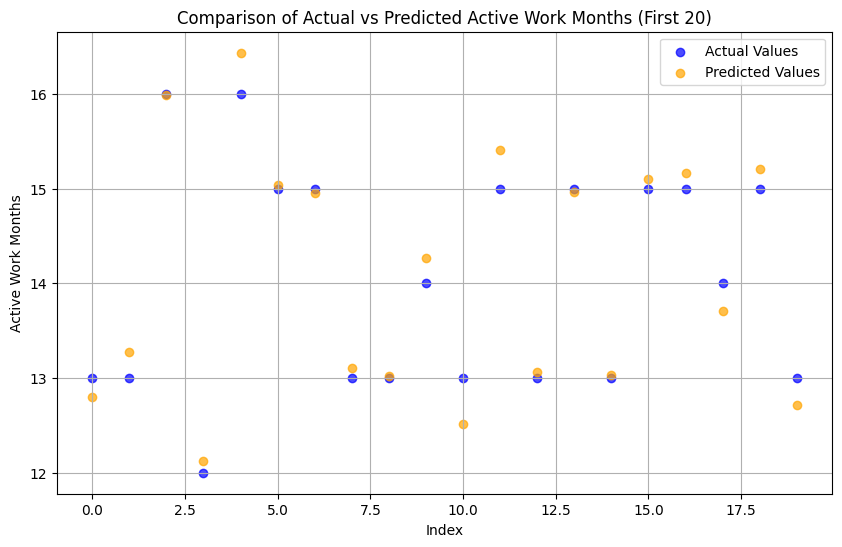

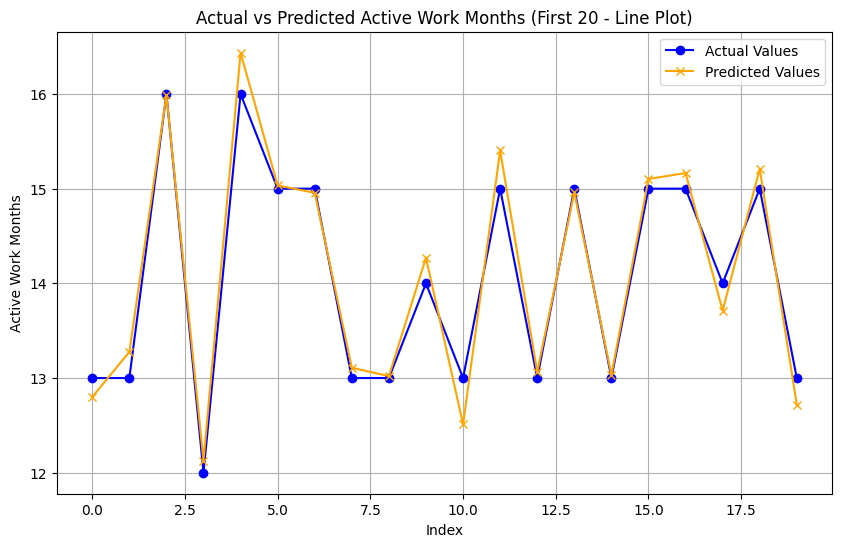

In [17]:
import matplotlib.pyplot as plt

# Membuat DataFrame untuk mempermudah visualisasi
comparison_df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_valid})

# Membatasi hanya pada 20 indeks pertama
comparison_df_subset = comparison_df.iloc[:20]

# Scatter plot untuk membandingkan prediksi dan nilai asli
plt.figure(figsize=(10, 6))
plt.scatter(range(len(comparison_df_subset)), comparison_df_subset['Actual'], label='Actual Values', alpha=0.7, color='blue')
plt.scatter(range(len(comparison_df_subset)), comparison_df_subset['Predicted'], label='Predicted Values', alpha=0.7, color='orange')
plt.title('Comparison of Actual vs Predicted Active Work Months (First 20)')
plt.xlabel('Index')
plt.ylabel('Active Work Months')
plt.legend()
plt.grid(True)
plt.show()

# Line plot untuk membandingkan prediksi dan nilai asli
plt.figure(figsize=(10, 6))
plt.plot(range(len(comparison_df_subset)), comparison_df_subset['Actual'], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(comparison_df_subset)), comparison_df_subset['Predicted'], label='Predicted Values', marker='x', linestyle='-', color='orange')
plt.title('Actual vs Predicted Active Work Months (First 20 - Line Plot)')
plt.xlabel('Index')
plt.ylabel('Active Work Months')
plt.legend()
plt.grid(True)
plt.show()

Final Training RMSE: 0.29921646798140256
Final Validation RMSE: 0.668770829713167


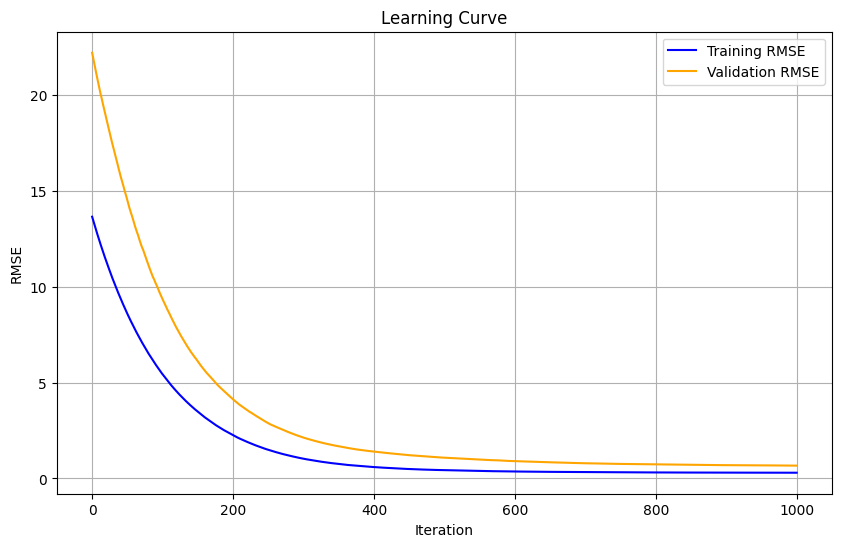

In [18]:
# Ambil hasil evaluasi dari model
evals_result = model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['RMSE'][-1]
val_score = evals_result['validation']['RMSE'][-1]

print(f"Final Training RMSE: {train_score}")
print(f"Final Validation RMSE: {val_score}")

# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_rmse = evals_result['learn']['RMSE']
val_rmse = evals_result['validation']['RMSE']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='orange')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

Final Training RMSE: 0.3278307241334987
Final Validation RMSE: 0.6157051131027085


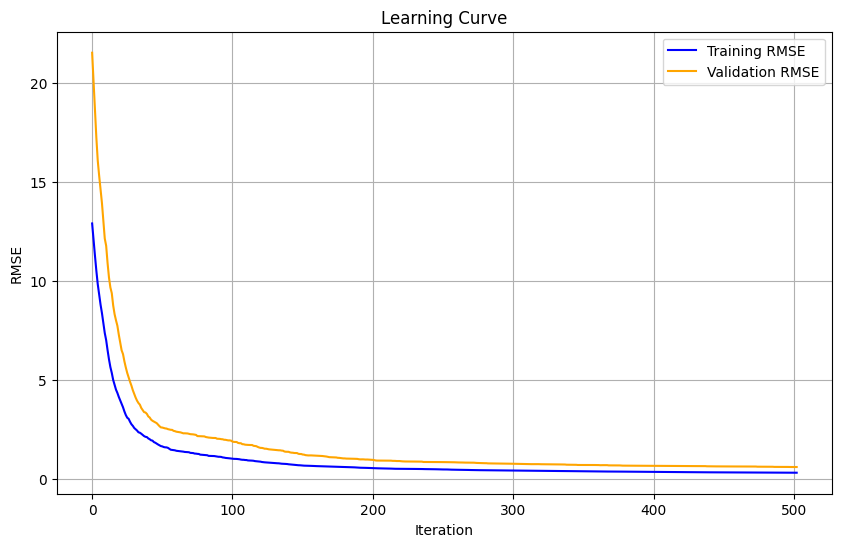

In [19]:
# Ambil hasil evaluasi dari model
evals_result = final_model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['RMSE'][-1]
val_score = evals_result['validation']['RMSE'][-1]

print(f"Final Training RMSE: {train_score}")
print(f"Final Validation RMSE: {val_score}")

# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_rmse = evals_result['learn']['RMSE']
val_rmse = evals_result['validation']['RMSE']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='orange')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [20]:
import pickle

with open('D:/Tugas Akhir/Codingan/Development/App/model/regression_model.sav', 'wb') as f:
    pickle.dump(model, f)
print("CatBoost Regression model saved to 'regression_model.sav'")

with open('D:/Tugas Akhir/Codingan/Development/App/model/regression_model_final.sav', 'wb') as f:
    pickle.dump(final_model, f)
print("CatBoost Regression model saved to 'regression_model.sav'")

CatBoost Regression model saved to 'regression_model.sav'
CatBoost Regression model saved to 'regression_model.sav'


In [21]:
# Mengurutkan data berdasarkan waktu (join_date)
df = df.sort_values('join_date')
X = df.drop(columns=['active_work_months', 'churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])
y = df['active_work_months']

0:	learn: 8.8750523	total: 25.8ms	remaining: 25.8s
200:	learn: 1.8266624	total: 6.35s	remaining: 25.3s
400:	learn: 0.6002046	total: 12.6s	remaining: 18.8s
600:	learn: 0.4057507	total: 19.2s	remaining: 12.7s
800:	learn: 0.3438624	total: 26.1s	remaining: 6.48s
999:	learn: 0.3090144	total: 32.8s	remaining: 0us
0:	learn: 10.0220337	total: 31.5ms	remaining: 31.5s
200:	learn: 1.8546127	total: 7.19s	remaining: 28.6s
400:	learn: 0.5945915	total: 14.6s	remaining: 21.8s
600:	learn: 0.4005480	total: 22.4s	remaining: 14.9s
800:	learn: 0.3411443	total: 30.4s	remaining: 7.56s
999:	learn: 0.3122553	total: 37.9s	remaining: 0us
0:	learn: 12.0372673	total: 31.3ms	remaining: 31.3s
200:	learn: 2.0552654	total: 7.95s	remaining: 31.6s
400:	learn: 0.5435496	total: 15.5s	remaining: 23.1s
600:	learn: 0.3529030	total: 24.1s	remaining: 16s
800:	learn: 0.3119731	total: 35.3s	remaining: 8.78s
999:	learn: 0.2901350	total: 44.6s	remaining: 0us
0:	learn: 13.6068194	total: 33.1ms	remaining: 33s
200:	learn: 2.2563070	t

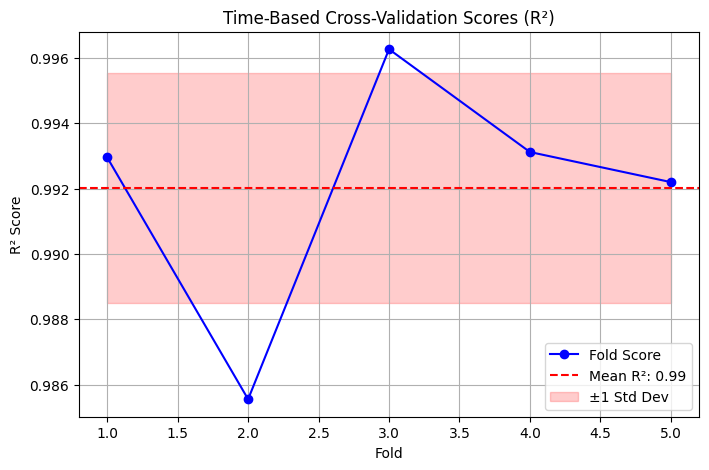

R² Scores for each fold: [0.99295281 0.98555108 0.99626666 0.99311907 0.99219813]
Mean R²: 0.99
Standard Deviation: 0.00


In [22]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung skor cross-validation dengan TimeSeriesSplit
def time_series_cross_validate_and_visualize_r2(model, X, y, n_splits=5):
    # TimeSeriesSplit untuk data terkait waktu
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Hitung skor cross-validation dengan metrik R²
    scores = cross_val_score(model, X, y, scoring='r2', cv=tscv)

    # Rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Visualisasi hasil cross-validation
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_splits + 1), scores, marker='o', linestyle='-', color='b', label='Fold Score')
    plt.axhline(y=mean_score, color='r', linestyle='--', label=f'Mean R²: {mean_score:.2f}')
    plt.fill_between(range(1, n_splits + 1), mean_score - std_score, mean_score + std_score, color='r', alpha=0.2, label='±1 Std Dev')
    plt.title('Time-Based Cross-Validation Scores (R²)')
    plt.xlabel('Fold')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid()
    plt.show()

    # Cetak hasil skor
    print(f'R² Scores for each fold: {scores}')
    print(f'Mean R²: {mean_score:.2f}')
    print(f'Standard Deviation: {std_score:.2f}')

# Contoh penggunaan
time_series_cross_validate_and_visualize_r2(model, X, y, n_splits=5)

0:	learn: 8.5630578	total: 16.1ms	remaining: 8.06s
200:	learn: 0.5107908	total: 4.03s	remaining: 6.06s
400:	learn: 0.3604313	total: 7.99s	remaining: 2.03s
502:	learn: 0.3165540	total: 10s	remaining: 0us
0:	learn: 9.5529013	total: 17ms	remaining: 8.55s
200:	learn: 0.4700119	total: 3.87s	remaining: 5.82s
400:	learn: 0.3262747	total: 7.8s	remaining: 1.99s
502:	learn: 0.2981762	total: 9.81s	remaining: 0us
0:	learn: 11.4700344	total: 21.5ms	remaining: 10.8s
200:	learn: 0.5099111	total: 4.01s	remaining: 6.03s
400:	learn: 0.3514503	total: 8.33s	remaining: 2.12s
502:	learn: 0.3192977	total: 10.6s	remaining: 0us
0:	learn: 12.7466664	total: 17.5ms	remaining: 8.79s
200:	learn: 0.5007439	total: 4.37s	remaining: 6.57s
400:	learn: 0.3683378	total: 8.96s	remaining: 2.28s
502:	learn: 0.3294694	total: 11.4s	remaining: 0us
0:	learn: 13.5880849	total: 21.3ms	remaining: 10.7s
200:	learn: 0.4678309	total: 6.53s	remaining: 9.82s
400:	learn: 0.3400938	total: 13.5s	remaining: 3.42s
502:	learn: 0.3059784	total

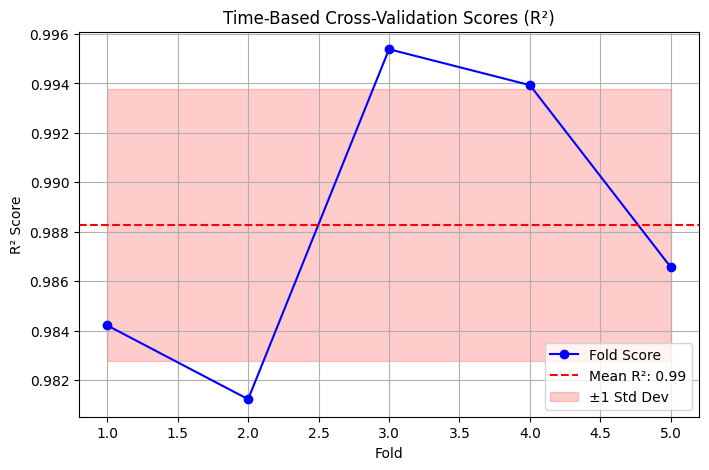

R² Scores for each fold: [0.98420943 0.98122294 0.99538229 0.99392864 0.98656069]
Mean R²: 0.99
Standard Deviation: 0.01


In [23]:
time_series_cross_validate_and_visualize_r2(final_model, X, y, n_splits=5)

In [24]:
df_test = pd.read_csv('D:/Tugas Akhir/Codingan/Development/App/data/df_test_YESUSFIX.csv')
df_test.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM6407,Kota Jakarta Selatan,Laki-laki,1981-03-05,2022-03-13,2023-08-08,Married,3,D3,3.0,...,1.169413e+08,1.719725e+06,1.22500,Mid-term,4.250000,4,1.719725e+06,4,1.719725e+06,3.4
1,EM6881,Tangerang,Laki-laki,1974-04-26,2022-04-11,2023-05-31,Married,0,D3,2.0,...,1.369110e+08,1.053162e+07,1.17375,Mid-term,4.333333,4,2.632904e+06,4,2.632904e+06,4.0
2,EM9588,Kota Depok,Perempuan,1980-01-08,2022-02-22,2023-08-30,Married,3,D1,4.0,...,1.408170e+08,1.955791e+06,1.18625,Mid-term,3.600000,4,1.955791e+06,2,3.911582e+06,3.6
3,EM6817,Kota Jakarta Timur,Perempuan,1985-06-15,2021-09-04,2023-01-13,Married,2,SLTA,10.0,...,3.969525e+07,8.269843e+05,1.13125,Mid-term,1.454545,1,2.480953e+06,1,2.480953e+06,1.0
4,EM0933,Kota Jakarta Timur,Laki-laki,1981-10-31,2022-03-20,2024-09-08,Married,1,SLTA,7.0,...,2.918537e+08,4.864228e+06,1.14125,Mid-term,3.750000,4,2.432114e+06,1,9.728456e+06,4.0


In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Menghapus kolom yang tidak diperlukan untuk prediksi
X_test = df_test.drop(columns=['active_work_months','churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])

# Lakukan prediksi menggunakan model final
y_pred = model.predict(X_test)

# Tambahkan prediksi ke DataFrame
X_test['predicted_active_work'] = y_pred

# Hitung metrik evaluasi
r2 = r2_score(df_test['active_work_months'], y_pred)
mae = mean_absolute_error(df_test['active_work_months'], y_pred)
mse = mean_squared_error(df_test['active_work_months'], y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_test['active_work_months'], y_pred)

# Cetak hasil
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R² Score: 0.9979140808292275
Mean Absolute Error (MAE): 0.24215619984624856
Mean Squared Error (MSE): 0.09893091309450355
Root Mean Squared Error (RMSE): 0.31453284899117223
Mean Absolute Percentage Error (MAPE): 0.014547198355724301


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Menghapus kolom yang tidak diperlukan untuk prediksi
X_test = df_test.drop(columns=['active_work_months','churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date'])

# Lakukan prediksi menggunakan model final
y_pred = final_model.predict(X_test)

# Tambahkan prediksi ke DataFrame
X_test['predicted_active_work'] = y_pred

# Hitung metrik evaluasi
r2 = r2_score(df_test['active_work_months'], y_pred)
mae = mean_absolute_error(df_test['active_work_months'], y_pred)
mse = mean_squared_error(df_test['active_work_months'], y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_test['active_work_months'], y_pred)

# Cetak hasil
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R² Score: 0.9977667403012139
Mean Absolute Error (MAE): 0.2474148687203165
Mean Squared Error (MSE): 0.10591897532455063
Root Mean Squared Error (RMSE): 0.3254519554781483
Mean Absolute Percentage Error (MAPE): 0.014723133752014913
